In [1]:
from qiskit import QuantumCircuit, QiskitError
#from qiskit import execute, BasicAer
import qiskit.ignis.verification.randomized_benchmarking as rb
#import qiskit.test.benchmarks.randomized_benchmarking as br
import pyzx
from pyzx.circuit.qasmparser import QASMParser
from pyzx.circuit.qiskitqasmparser import QiskitQASMParser

In [2]:
#qc = rb.randomized_benchmarking_seq()
qc = rb.randomized_benchmarking_seq(nseeds=1, length_vector=None,
                                rb_pattern=[[0,1]],
                                length_multiplier=1, seed_offset=0,
                                align_cliffs=False,
                                interleaved_gates=None,
                                is_purity=False)
qc = qc[0][0][0]
type(qc)

qiskit.circuit.quantumcircuit.QuantumCircuit

In [3]:
# setting up the backend
# print(BasicAer.backends())

# running the job
# job_sim = execute(qc, BasicAer.get_backend('qasm_simulator'))
# sim_result = job_sim.result()

In [4]:
# print("\nPrint all gates:")
# [print(dat) for dat in qc.data]

In [5]:
qasm = qc.qasm()
#qasm = '\n'.join(['' if line.startswith("barrier") else line for line in qasm.splitlines()])

print("\nPrint QASM:")
print(qasm)




Print QASM:
OPENQASM 2.0;
include "qelib1.inc";
qreg qr[2];
creg cr[2];
h qr[1];
sdg qr[1];
h qr[1];
cx qr[0],qr[1];
h qr[0];
s qr[0];
sdg qr[1];
h qr[1];
x qr[0];
x qr[1];
barrier qr[0],qr[1];
x qr[1];
x qr[0];
h qr[1];
s qr[1];
sdg qr[0];
h qr[0];
cx qr[0],qr[1];
h qr[1];
s qr[1];
h qr[1];
measure qr[0] -> cr[0];
measure qr[1] -> cr[1];



In [6]:
# Draw the circuit
print(qc)

                                ┌───┐ ┌───┐┌───┐ ░ ┌───┐┌─────┐┌───┐     ┌─┐»
qr_0: |0>───────────────────■───┤ H ├─┤ S ├┤ X ├─░─┤ X ├┤ Sdg ├┤ H ├──■──┤M├»
         ┌───┐┌─────┐┌───┐┌─┴─┐┌┴───┴┐├───┤├───┤ ░ ├───┤└┬───┬┘├───┤┌─┴─┐└╥┘»
qr_1: |0>┤ H ├┤ Sdg ├┤ H ├┤ X ├┤ Sdg ├┤ H ├┤ X ├─░─┤ X ├─┤ H ├─┤ S ├┤ X ├─╫─»
         └───┘└─────┘└───┘└───┘└─────┘└───┘└───┘ ░ └───┘ └───┘ └───┘└───┘ ║ »
 cr_0: 0 ═════════════════════════════════════════════════════════════════╩═»
                                                                            »
 cr_1: 0 ═══════════════════════════════════════════════════════════════════»
                                                                            »
«                        
«qr_0: ──────────────────
«      ┌───┐┌───┐┌───┐┌─┐
«qr_1: ┤ H ├┤ S ├┤ H ├┤M├
«      └───┘└───┘└───┘└╥┘
«cr_0: ════════════════╬═
«                      ║ 
«cr_1: ════════════════╩═
«                        


In [7]:
p = QiskitQASMParser()
circ_list, whichpyzx = p.qiskitparse(qasm)
print(circ_list)
print(whichpyzx)
print(p.registers)

['qreg qr[2];', 'creg cr[2];', Circuit(2 qubits, 10 gates), 'barrier qr[0],qr[1];', Circuit(2 qubits, 10 gates), 'measure qr[0] -> cr[0];', 'measure qr[1] -> cr[1];']
[2, 4]
{'qr': (0, 2)}


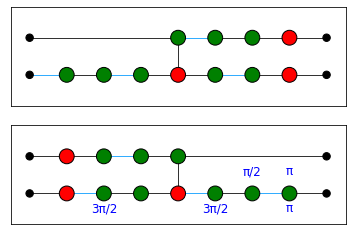

In [8]:
#qasm = qc.decompose().qasm()
pyzx.draw_many(circ_list, whichpyzx)


#print(circ_list)
#print(len(circ_list))
#print(whichpyzx)
# whichplt = 0
# for i in range(len(circ_list)):
#     if isinstance(circ_list[i], str):
#         pass
#     else:
#         circ_list[i].name = "pyzx_" + qc.name + "_" + str(i)
#         plt.axes(axs[whichplt])
#         fig = pyzx.draw(circ_list[i])
#         break
#plt.show()
#c.name = "pyzx_" + qc.name
#pyzx.draw(c)
#pyzx.draw(c.to_graph(), layout=None, labels=False, figsize=(16,4), h_edge_draw='blue', rows=None)

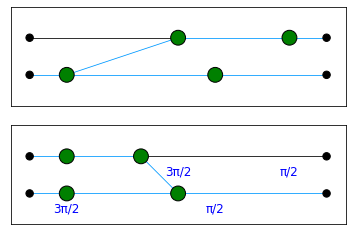

In [9]:
graph_list = [circ_list[w].to_graph() for w in whichpyzx]
[pyzx.full_reduce(g) for g in graph_list]
pyzx.draw_many(graph_list, range(len(whichpyzx)))

In [10]:
# pyzx.draw(graph_list[1])
# new_c = pyzx.extract.streaming_extract(graph_list[1])
# print(new_c.to_basic_gates().to_qasm())

pyzx_circ_list = [pyzx.extract.streaming_extract(g) for g in graph_list]
pyzx_circ_list = [pyzx.optimize.basic_optimization(new_c.to_basic_gates()) for new_c in pyzx_circ_list]

##new_c = c.from_graph(g)
pyzx_qasm = [new_c.to_basic_gates().to_qasm() for new_c in pyzx_circ_list]


### WTF causes the 3 duplicated lines below to get rid of duplicate hadamards
# pyzx_circ_list = [pyzx.extract.streaming_extract(g) for g in graph_list]
# ##new_c = c.from_graph(g)
# pyzx_qasm = [new_c.to_basic_gates().to_qasm() for new_c in pyzx_circ_list]

#pyzx_qasm = ["\n".join(circ.splitlines()[2:]) for circ in pyzx_qasm]
pyzx_qasm = ["\n".join(['' if line.startswith("qreg") else line for line in circ.splitlines()[2:]]) for circ in pyzx_qasm]



In [11]:
##pyzx_qasm = [string.replace(';', '') for string in pyzx_qasm]
for new_qasm in pyzx_qasm:
    [print(line) for line in new_qasm.splitlines()]
    print()


cx q[0], q[1];
rz(0.5*pi) q[1];
h q[0];
rz(0.5*pi) q[0];
x q[1];
x q[0];


rz(0.5*pi) q[0];
h q[0];
z q[0];
rz(0.5*pi) q[1];
cx q[0], q[1];
x q[1];



In [12]:
#now we need to map registers and glue all the pieces back together
for i in range(len(pyzx_qasm)):
    circ_list[whichpyzx[i]] = pyzx_qasm[i]
#print(circ_list)
## join the
qasm_string = 'OPENQASM 2.0;\ninclude "qelib1.inc";\n'+"\n".join(circ_list)
qasm_string = qasm_string.replace('q[', 'qr[')
print(qasm_string)

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[2];
creg cr[2];

cx qr[0], qr[1];
rz(0.5*pi) qr[1];
h qr[0];
rz(0.5*pi) qr[0];
x qr[1];
x qr[0];
barrier qr[0],qr[1];

rz(0.5*pi) qr[0];
h qr[0];
z qr[0];
rz(0.5*pi) qr[1];
cx qr[0], qr[1];
x qr[1];
measure qr[0] -> cr[0];
measure qr[1] -> cr[1];


In [13]:
# pqsl = [line + "\n" for line in pyzx_qasm] #took out .splitlines()
# qsl = [line + "\n" for line in qasm.splitlines()]
# # print(pqsl)
# # print(qsl)
# new_qasm = '\n'.join(qsl[0:4]) + ''.join(pqsl[3:]) + ''.join(qsl[-2:])
# new_qasm = new_qasm.replace('q[', 'qr[')
# print(new_qasm)

In [14]:
new_qc = qc.from_qasm_str(qasm_string)
print(new_qc)

                  ┌───┐     ┌────────────┐┌───┐ ░ ┌────────────┐┌───┐┌───┐     »
qr_0: |0>──■──────┤ H ├─────┤ Rz(0.5*pi) ├┤ X ├─░─┤ Rz(0.5*pi) ├┤ H ├┤ Z ├──■──»
         ┌─┴─┐┌───┴───┴────┐└───┬───┬────┘└───┘ ░ ├────────────┤└───┘└───┘┌─┴─┐»
qr_1: |0>┤ X ├┤ Rz(0.5*pi) ├────┤ X ├───────────░─┤ Rz(0.5*pi) ├──────────┤ X ├»
         └───┘└────────────┘    └───┘           ░ └────────────┘          └───┘»
 cr_0: 0 ══════════════════════════════════════════════════════════════════════»
                                                                               »
 cr_1: 0 ══════════════════════════════════════════════════════════════════════»
                                                                               »
«      ┌─┐        
«qr_0: ┤M├────────
«      └╥┘┌───┐┌─┐
«qr_1: ─╫─┤ X ├┤M├
«       ║ └───┘└╥┘
«cr_0: ═╩═══════╬═
«               ║ 
«cr_1: ═════════╩═
«                 
